In [3]:
from scipy import stats
import numpy as np
import pandas as pd

male_df = [12, 7, 7, 10, 8, 10, 11, 9, 9, 13,
          4, 9, 12, 11, 9, 9, 7, 12, 10, 13,
           11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 
           13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 
           11, 7, 15, 8, 9, 11, 13, 10, 13
          ]
female_df = [11, 10, 11, 10, 11, 12,12, 10, 9, 9,
            9, 10, 8, 7, 12, 9, 7, 8, 9, 8,
            7, 7, 9, 9, 12, 10, 9, 13, 9, 9,
            10, 9, 6, 12, 8, 11, 8, 8, 11, 12,
            9, 10, 11, 14, 12, 7, 11, 10, 9, 11]

male_data_df = pd.Series(male_df)
female_data_df = pd.Series(female_df)
n = male_data_df.count()

### 1. Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

<b>Null Hypothesis (H<sub>0</sub>)</b>: The mean time spent talking on cell phones by males is equal to the mean time spent by females.

This is written as: H<sub>0</sub>: $\mu_1$ =  $\mu_2$

<b>Alternative Hypothesis(H<sub>1</sub>)</b>: The mean time spent talking on cell phones by males is not equal to the mean time spent by females.

This is written as: H<sub>1</sub>: $\mu_1$ ≠  $\mu_2$

#### Rationale
We are to test if there is a significant difference in the average time spent talking on cell phones between male and female students. This study will be using a two-tailed independent samples t-test, as we try to compare the means of two independent groups (males and females), assuming they do not have a direction of differences. 

### 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?

In [12]:
levene_stat, levene_p_val = stats.levene(male_df, female_df)

print("Test Statistic value:", levene_stat)
print("P-value associated with the test statistic:", levene_p_val)

if levene_p_val > 0.05:
    print("Equal Variances.\n")
else:
    print("Unequal Variances. \n")

Test Statistic value: 0.7774878203216727
P-value associated with the test statistic: 0.3800903196708094
Equal Variances.



Since the calculated p value by the levene test turns out to be equal, we are assured that variance will be True.

In [14]:
t_stat, p_val = stats.ttest_ind(male_df, female_df, equal_var=True)
print(f"The t-value is {t_stat} and the p_value is {p_val}")

The t-value is 0.3431287248573532 and the p_value is 0.732244158163853


since the p-value is greater than 0.05, the null hypothesis will not be rejected.

##### Recommendation to the researchers

Based on the given data, the researchers should conclude that there are no significant difference in phone usage between males and females. However, we are to test if the mean of both males and females are equal.

 ### 3. Provide descriptive statistical summaries of the data for each gender category.

#### Descriptive Summary for Males

In [26]:
data_male_np = pd.DataFrame(male_df, columns = ['Value'])

valid = len(data_male_np)
mean = data_male_np['Value'].mean()
std_dv = data_male_np['Value'].std(ddof=1)
var = data_male_np['Value'].var(ddof=1)
std_error_skewness = np.sqrt(((6)*(n)*(n-1))/((n-2)*(n+1)*(n+3)))
skewness = stats.skew(data_male_np['Value'])
kurtosis = stats.kurtosis(data_male_np['Value'])
std_error_kurtosis = np.sqrt(24 / n)
min_val = data_male_np['Value'].min()
max_val = data_male_np['Value'].max()
mode_val = stats.mode(data_male_np['Value'], keepdims=True)[0][0]
median = data_male_np['Value'].median()

Q1 = np.percentile(data_male_np['Value'], 25)
Q2 = np.percentile(data_male_np['Value'], 50)
Q3 = np.percentile(data_male_np['Value'], 75)
D9 = np.percentile(data_male_np['Value'], 90)
P95 = np.percentile(data_male_np['Value'], 95)

dp_summary_male = {
    'Valid': valid,
    'Mode': mode_val,
    'Median': median,
    'Mean': mean,
    'Std. deviation': std_dv,
    'Variance': var,
    'Skewness': skewness,
    'Std. Error of Skewness': std_error_skewness,
    'Kurtosis': kurtosis, 
    'Std. Error of Kurtosis': std_error_kurtosis,
    'Minimum': min_val, 
    'Maximum': max_val, 
    'Q1 (25th percentile)': Q1,
    'Q2 (50th percentile)': Q2,
    'Q3 (75th percentile)': Q3,
    'D9 (90th percentile)': D9,
    'P95 (95th percentile)': P95
}

summary_df = pd.DataFrame(dp_summary_male.items(), columns=['Measures_Male', 'Value'])
summary_df = summary_df.round(3)
display(summary_df)

,Measures_Male,Value
0,Valid,49.000
1,Mode,10.000
2,Median,10.000
3,Mean,9.837
4,Std. deviation,2.173
5,Variance,4.723
6,Skewness,-0.133
7,Std. Error of Skewness,0.340
8,Kurtosis,0.003
9,Std. Error of Kurtosis,0.700


#### Descriptive Summary for Females

In [27]:
data_female_np = pd.DataFrame(female_df, columns = ['Value'])

valid = len(data_female_np)
mean = data_female_np['Value'].mean()
std_dv = data_female_np['Value'].std(ddof=1)
var = data_female_np['Value'].var(ddof=1)
std_error_skewness = np.sqrt(((6)*(n)*(n-1))/((n-2)*(n+1)*(n+3)))
skewness = stats.skew(data_female_np['Value'])
kurtosis = stats.kurtosis(data_female_np['Value'])
std_error_kurtosis = np.sqrt(24 / n)
min_val = data_female_np['Value'].min()
max_val = data_female_np['Value'].max()
mode_val = stats.mode(data_female_np['Value'], keepdims=True)[0][0]
median = data_female_np['Value'].median()

Q1 = np.percentile(data_female_np['Value'], 25)
Q2 = np.percentile(data_female_np['Value'], 50)
Q3 = np.percentile(data_female_np['Value'], 75)
D9 = np.percentile(data_female_np['Value'], 90)
P95 = np.percentile(data_female_np['Value'], 95)

dp_summary_female = {
    'Valid': valid,
    'Mode': mode_val,
    'Median': median,
    'Mean': mean,
    'Std. deviation': std_dv,
    'Variance': var,
    'Skewness': skewness,
    'Std. Error of Skewness': std_error_skewness,
    'Kurtosis': kurtosis, 
    'Std. Error of Kurtosis': std_error_kurtosis,
    'Minimum': min_val, 
    'Maximum': max_val, 
    'Q1 (25th percentile)': Q1,
    'Q2 (50th percentile)': Q2,
    'Q3 (75th percentile)': Q3,
    'D9 (90th percentile)': D9,
    'P95 (95th percentile)': P95
}

summary_df = pd.DataFrame(dp_summary_female.items(), columns=['Measures_Female', 'Value'])
summary_df = summary_df.round(3)
display(summary_df)

,Measures_Female,Value
0,Valid,50.000
1,Mode,9.000
2,Median,9.500
3,Mean,9.700
4,Std. deviation,1.776
5,Variance,3.153
6,Skewness,0.130
7,Std. Error of Skewness,0.340
8,Kurtosis,-0.516
9,Std. Error of Kurtosis,0.700


### 4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

In [38]:

n_males = len(male_df)
n_females = len(female_df)
mean_males = np.mean(male_df)
mean_females = np.mean(female_df)
std_males = np.std(male_df, ddof=1)  
std_females = np.std(female_df, ddof=1)
mean_diff = mean_males - mean_females
pooled_se = np.sqrt((std_males**2/n_males) + (std_females**2/n_females))


ci_males = stats.t.interval(0.95, len(male_df)-1, loc=mean_males, scale=std_males/np.sqrt(len(male_df)))
ci_females = stats.t.interval(0.95, len(female_df)-1, loc=mean_females, scale=std_females/np.sqrt(len(female_df)))

ci_diff = stats.t.interval(0.95, df=min(n_males, n_females)-1, loc=mean_diff, scale=pooled_se)

print(f"The 95% confidence interval for males is {ci_males}.")
print(f"The 95% confidence interval for males is {ci_females}.")
print(f"The 95% confidence interval for the difference between the two populations is {ci_diff}.")

The 95% confidence interval for males is (9.212519375591981, 10.46095001216312).
The 95% confidence interval for males is (9.19535558679254, 10.20464441320746).
The 95% confidence interval for the difference between the two populations is (-0.6661223022641037, 0.9395916900192068).


### 5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

Although the current data has given us sufficient insights where we can interpret its outcome, having a larger sample size will further give credibility the phone usage between genders. With a larger sample size, it will give us a more accurate conclusion with the study.

### 6. Make a report including the testing of the assumptions for two independent samples t-test.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_male = stats.shapiro(male_df)
shapiro_female = stats.shapiro(female_df)

print(f'Shapiro-Wilk Test for Males:\n{shapiro_male}\n')
print(f'Shapiro-Wilk Test for Females:\n{shapiro_female}\n')

print("\nLevene's Test for Homogeneity of Variances:")
levene_test = stats.levene(male_df, female_df)
print(levene_test)

print("\nTwo Independent Samples t-test:")
t_test = stats.ttest_ind(male_df, female_df)
t_test

Shapiro-Wilk Test for Males:
ShapiroResult(statistic=0.9749923348426819, pvalue=0.3776538372039795)

Shapiro-Wilk Test for Females:
ShapiroResult(statistic=0.9638767838478088, pvalue=0.12919674813747406)


Levene's Test for Homogeneity of Variances:
LeveneResult(statistic=0.7774878203216727, pvalue=0.3800903196708094)

Two Independent Samples t-test:


TtestResult(statistic=0.3431287248573532, pvalue=0.732244158163853, df=97.0)

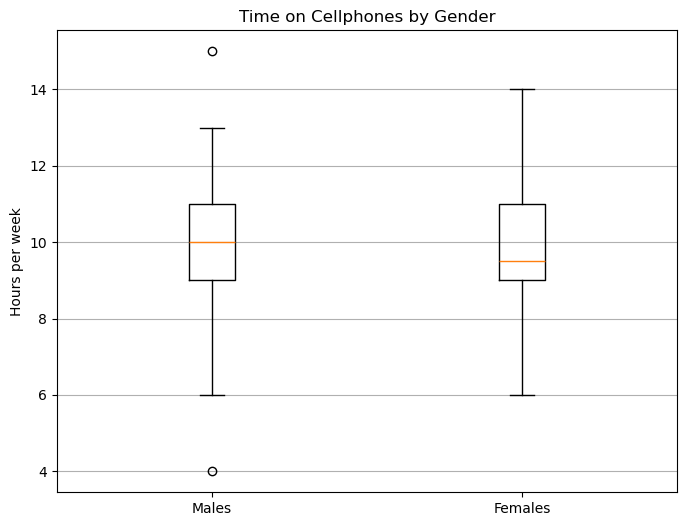

In [6]:
data = [male_df, female_df]
labels = ['Males', 'Females']
plt.figure(figsize=(8,6))
plt.boxplot(data, labels=labels)
plt.title('Time on Cellphones by Gender')
plt.ylabel('Hours per week')
plt.grid(axis='y')
plt.show()

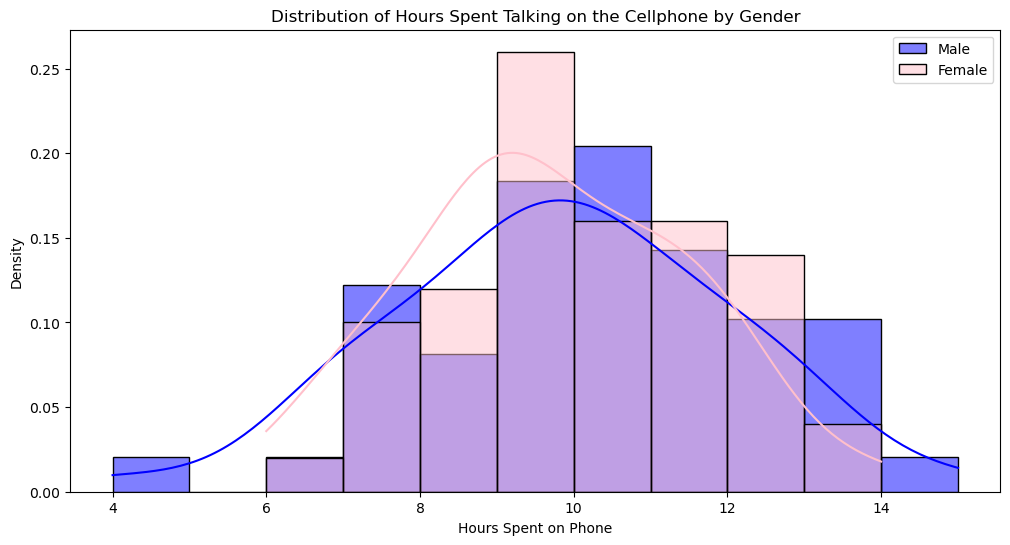

In [8]:
data_male = np.array(male_df)
data_female = np.array(female_df)
plt.figure(figsize=(12,6))
sns.histplot(data_male, color='blue', kde=True, stat='density', label="Male", alpha=0.5)
sns.histplot(data_female, color='pink', kde=True, stat='density', label="Female", alpha=0.5)

plt.title('Distribution of Hours Spent Talking on the Cellphone by Gender')
plt.xlabel('Hours Spent on Phone')
plt.ylabel('Density')
plt.legend()
plt.show()